# Sentiment Analysis Spiderman No Way from Twitter
Created by : <br>
Adhitya Primandhika <br>
19/444033/TK/49229

---

In this project we will see the sentiment on Twitter about latest Spiderman movie that will release in near time.

# Import libraries

In [ ]:
!pip install git+git://github.com/twintproject/twint
#!pip install --user --upgrade git+git://github.com/twintproject/twint
!pip install tweet-preprocessor
import re
import twint
import nest_asyncio
import pandas as pd
import preprocessor as p
p.set_options(p.OPT.MENTION, p.OPT.EMOJI, p.OPT.HASHTAG, p.OPT.RESERVED, p.OPT.SMILEY, p.OPT.URL)
import matplotlib.dates as mdates
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from collections import Counter
import nltk       
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("twitter_samples")
from nltk.corpus import stopwords        
from nltk.corpus import twitter_samples  # Sample Twitter dataset from NLTK
from textblob import TextBlob
nest_asyncio.apply()

  Cloning git://github.com/twintproject/twint to /tmp/pip-req-build-ctnmdn4f
  Running command git clone -q git://github.com/twintproject/twint /tmp/pip-req-build-ctnmdn4f
     |████████████████████████████████| 1.1 MB 8.5 MB/s 
     |████████████████████████████████| 263 kB 44.3 MB/s 
     |████████████████████████████████| 385 kB 57.3 MB/s 
     |████████████████████████████████| 291 kB 54.7 MB/s 
     |████████████████████████████████| 160 kB 53.7 MB/s 
     |████████████████████████████████| 192 kB 70.2 MB/s 
     |████████████████████████████████| 271 kB 78.3 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38870 sha256=217b710791bc896dbafeb4b7a29083e2118b0ff70768cb704cacc7efe3f8a9e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-8jfh2c9a/wheels/8a/34/08/7b340ef9c524af6c431e3027a46db1817ef7adb99ff19a86b4
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=135

# Scraping

In [ ]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

PROJECT_NAME = "SpiderManNoWayHome"

## Configure

In [ ]:
c = twint.Config()
c.Store_json = True
c.Output = f"{PROJECT_NAME}.json"
c.Search = "#SpiderManNoWayHome"
#c.Since = "2021-08-24"
c.Until = "2021-12-10"
c.Lang = "en"
c.Resume = "resume.txt"
 
c.Hide_output = True

In [ ]:
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [ ]:
!head -n5 SpiderManNoWayHome.json

{"id": 1469094353222213635, "conversation_id": "1469094353222213635", "created_at": "2021-12-09 23:59:22 UTC", "date": "2021-12-09", "time": "23:59:22", "timezone": "+0000", "user_id": 1147810186750496769, "username": "_gl0w0_", "name": "⚡ Glowoh 🕷", "place": "", "tweet": "🤷‍♂️🕷 #SpiderManNoWayHome #Venom #SpiderMan #Fortnite  https://t.co/ATIYgVmygL", "language": "und", "mentions": [], "urls": [], "photos": ["https://pbs.twimg.com/media/FGNFhdJXsAk7H44.jpg", "https://pbs.twimg.com/media/FGNFhmiXsAIjxN2.jpg", "https://pbs.twimg.com/media/FGNFhuMXwAAiBnO.jpg", "https://pbs.twimg.com/media/FGNFh1sX0AYr6v_.jpg"], "replies_count": 2, "retweets_count": 2, "likes_count": 6, "hashtags": ["spidermannowayhome", "venom", "spiderman", "fortnite"], "cashtags": [], "link": "https://twitter.com/_gl0w0_/status/1469094353222213635", "retweet": false, "quote_url": "", "video": 1, "thumbnail": "https://pbs.twimg.com/media/FGNFhdJXsAk7H44.jpg", "near": "", "geo": "", "source": "", "user_rt_id": "", "user

In [ ]:
!tail -n5 SpiderManNoWayHome.json

{"id": 1466129856538845186, "conversation_id": "1466129856538845186", "created_at": "2021-12-01 19:39:31 UTC", "date": "2021-12-01", "time": "19:39:31", "timezone": "+0000", "user_id": 2480221081, "username": "fdezxcobo", "name": "𝐬𝐞𝐧𝐬𝐞 𝐟𝐚𝐥𝐥𝐨𝐬🍿𝐦𝐞𝐬 𝐪𝐮𝐞 𝐦𝐚𝐢💖", "place": "", "tweet": "‼ATENCIÓN‼   Me equivoqué al coger la entrada de #SpiderManNoWayHome para el JUEVES 16 DE DICIEMBRE A LAS 19:00 HORAS en CINE YELMO PREMIUM EL FARO de BADAJOZ  La butaca es H9 (centrado en penúltima fila). La vendo por 5 EUROS  MD Interesados   RT para difundir  https://t.co/52ScvtfhX1", "language": "es", "mentions": [], "urls": [], "photos": ["https://pbs.twimg.com/tweet_video_thumb/FFi9VHGXsAE0Ehd.jpg"], "replies_count": 0, "retweets_count": 13, "likes_count": 7, "hashtags": ["spidermannowayhome"], "cashtags": [], "link": "https://twitter.com/fdezxcobo/status/1466129856538845186", "retweet": false, "quote_url": "", "video": 1, "thumbnail": "https://pbs.twimg.com/tweet_video_thumb/FFi9VHGXsAE0Ehd.jpg", "near

## Pre-Processing

### Reindex

In [ ]:
df = pd.read_json("{}.json".format(PROJECT_NAME), lines = True)

df.index = range(len(df))

df["created_at"] = pd.to_datetime(df["created_at"]).dt.tz_convert("Asia/Jakarta")
df["date"] = pd.to_datetime(df["date"])
df["id"] = pd.to_numeric(df["id"])
df_tweets = df[df["language"] == "en"]
df_tweets[["id","created_at","date","tweet","language"]]

,id,created_at,date,tweet,language
1,1469094336952475651,2021-12-10 06:59:19+07:00,2021-12-09,Can’t believe we’re about to witness an Avengers Endgame level movie NEXT WEEK #SpiderManNoWayHome its been a while tbh.. !,en
8,1469093770918572039,2021-12-10 06:57:04+07:00,2021-12-09,Im waiting 👀 #SpiderManNoWayHome @MarvelStudios https://t.co/AnFH8pET5w,en
9,1469093536628985857,2021-12-10 06:56:08+07:00,2021-12-09,One week away #SpiderManNoWayHome https://t.co/eVlQt9wvNm,en
10,1469093126367158272,2021-12-10 06:54:30+07:00,2021-12-09,Show me who you would cast as Harry Osborn in the MCU after #SpiderManNoWayHome,en
13,1469092855377539075,2021-12-10 06:53:25+07:00,2021-12-09,"@ComicBook New Scene from the #DoctorOctopus streetfight for #SpiderManNoWayHome we see here a British Spiderman , Sparking his marbles on the street , something you never saw in original Spiderman Books , cause that wouldnt work with anything spiderman does , "" Nuts-on-Fire """,en
...,...,...,...,...,...
44144,1466130115734253572,2021-12-02 02:40:33+07:00,2021-12-01,Guess what month it is 😈 #SpiderMan #SpiderManNoWayHome https://t.co/HbbOm22nMA,en
44146,1466130099426803712,2021-12-02 02:40:29+07:00,2021-12-01,15 Days To Go 🚨 #SpiderManNoWayHome https://t.co/9OPkLG3b9N,en
44149,1466129865992814603,2021-12-02 02:39:34+07:00,2021-12-01,@SonyPictures We know you could do better. 👀 #SpiderManNoWayHome https://t.co/qqCsJq5BKC,en
44153,1466129479420497930,2021-12-02 02:38:01+07:00,2021-12-01,"Calling all you Spidey fans, check out our exclusive #SpiderManNoWayHome combo - available to pre-order online during ticket purchase or in cinema from 15 December. 🕷️ https://t.co/Fn2lL3452b https://t.co/XGAITjeAeA",en


### Drop duplicate

In [ ]:
df_tweets = pd.concat([df_tweets, df_tweets]).drop_duplicates(subset=['id'])
df_tweets.index = range(len(df_tweets))

df_tweets[["id","created_at","date","tweet","language"]]

,id,created_at,date,tweet,language
0,1469094336952475651,2021-12-10 06:59:19+07:00,2021-12-09,Can’t believe we’re about to witness an Avengers Endgame level movie NEXT WEEK #SpiderManNoWayHome its been a while tbh.. !,en
1,1469093770918572039,2021-12-10 06:57:04+07:00,2021-12-09,Im waiting 👀 #SpiderManNoWayHome @MarvelStudios https://t.co/AnFH8pET5w,en
2,1469093536628985857,2021-12-10 06:56:08+07:00,2021-12-09,One week away #SpiderManNoWayHome https://t.co/eVlQt9wvNm,en
3,1469093126367158272,2021-12-10 06:54:30+07:00,2021-12-09,Show me who you would cast as Harry Osborn in the MCU after #SpiderManNoWayHome,en
4,1469092855377539075,2021-12-10 06:53:25+07:00,2021-12-09,"@ComicBook New Scene from the #DoctorOctopus streetfight for #SpiderManNoWayHome we see here a British Spiderman , Sparking his marbles on the street , something you never saw in original Spiderman Books , cause that wouldnt work with anything spiderman does , "" Nuts-on-Fire """,en
...,...,...,...,...,...
20750,1466130115734253572,2021-12-02 02:40:33+07:00,2021-12-01,Guess what month it is 😈 #SpiderMan #SpiderManNoWayHome https://t.co/HbbOm22nMA,en
20751,1466130099426803712,2021-12-02 02:40:29+07:00,2021-12-01,15 Days To Go 🚨 #SpiderManNoWayHome https://t.co/9OPkLG3b9N,en
20752,1466129865992814603,2021-12-02 02:39:34+07:00,2021-12-01,@SonyPictures We know you could do better. 👀 #SpiderManNoWayHome https://t.co/qqCsJq5BKC,en
20753,1466129479420497930,2021-12-02 02:38:01+07:00,2021-12-01,"Calling all you Spidey fans, check out our exclusive #SpiderManNoWayHome combo - available to pre-order online during ticket purchase or in cinema from 15 December. 🕷️ https://t.co/Fn2lL3452b https://t.co/XGAITjeAeA",en


### Clean tweets

In [ ]:
df_tweets['tweet'] = [p.clean(tweet) for tweet in df_tweets['tweet']] # Clean tweets from any mention, emoji, hashtag, reserve words(such as FAV, RT), smiley, and url
df_tweets['tweet'] = [re.sub(r"[^a-zA-Z0-9]+", ' ', tweet) for tweet in df_tweets['tweet']] # Only take alphanumeric tweet
df_tweets[["id","created_at","date","tweet","language"]]

,id,created_at,date,tweet,language
0,1469094336952475651,2021-12-10 06:59:19+07:00,2021-12-09,Cant believe were about to witness an Avengers Endgame level movie NEXT WEEK its been a while tbh,en
1,1469093770918572039,2021-12-10 06:57:04+07:00,2021-12-09,Im waiting,en
2,1469093536628985857,2021-12-10 06:56:08+07:00,2021-12-09,One week away,en
3,1469093126367158272,2021-12-10 06:54:30+07:00,2021-12-09,Show me who you would cast as Harry Osborn in the MCU after,en
4,1469092855377539075,2021-12-10 06:53:25+07:00,2021-12-09,New Scene from the streetfight for we see here a British Spiderman Sparking his marbles on the street something you never saw in original Spiderman Books cause that wouldnt work with anything spiderman does Nuts on Fire,en
...,...,...,...,...,...
20750,1466130115734253572,2021-12-02 02:40:33+07:00,2021-12-01,Guess what month it is,en
20751,1466130099426803712,2021-12-02 02:40:29+07:00,2021-12-01,15 Days To Go,en
20752,1466129865992814603,2021-12-02 02:39:34+07:00,2021-12-01,We know you could do better,en
20753,1466129479420497930,2021-12-02 02:38:01+07:00,2021-12-01,Calling all you Spidey fans check out our exclusive combo available to pre order online during ticket purchase or in cinema from 15 December,en


In [ ]:
df_tweets.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video
count,2.075500e+04,2.075500e+04,20755.0,2.075500e+04,20755.000000,20755.000000,20755.000000,20755.000000
mean,1.467575e+18,1.467422e+18,0.0,7.755664e+17,1.997735,12.252421,133.488075,0.537461
std,8.633366e+14,6.807405e+15,0.0,6.130939e+17,20.918435,111.649581,1059.142770,0.498607
min,1.466129e+18,8.070860e+17,0.0,5.244630e+05,0.000000,0.000000,0.000000,0.000000
25%,1.466813e+18,1.466802e+18,0.0,1.604771e+09,0.000000,0.000000,0.000000,0.000000
50%,1.467566e+18,1.467556e+18,0.0,1.048369e+18,0.000000,0.000000,1.000000,1.000000
75%,1.468326e+18,1.468315e+18,0.0,1.332094e+18,1.000000,1.000000,5.000000,1.000000
max,1.469094e+18,1.469094e+18,0.0,1.468979e+18,1894.000000,4991.000000,42755.000000,1.000000


# Show distribution of tweets

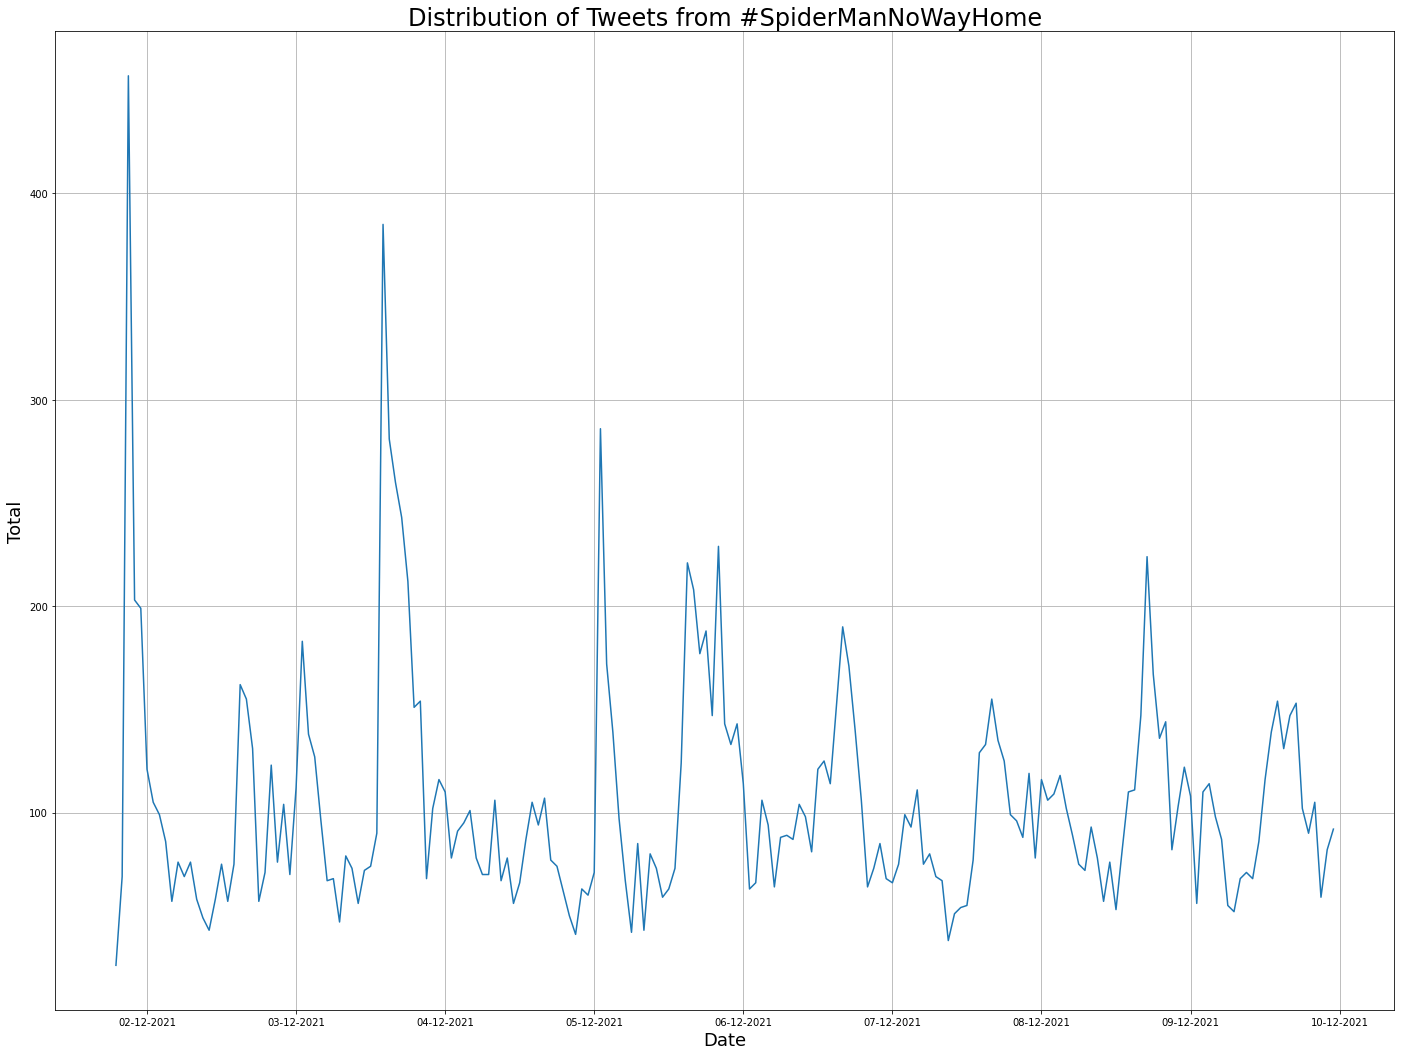

In [ ]:
df_tweets["date"] = pd.to_datetime(df_tweets["created_at"]).dt.tz_convert('Asia/Jakarta')
tmp = df_tweets.groupby(pd.to_datetime(df_tweets["date"]).dt.floor('1H'))["id"].count()
weeks = mdates.WeekdayLocator()
days = mdates.DayLocator()
days_fmt = mdates.DateFormatter('%d-%m-%Y')

fig, ax = plt.subplots(figsize=(24,18))
plt.title(f"Distribution of Tweets from #{PROJECT_NAME}", fontsize=24)
plt.ylabel('Total', fontsize=18)
plt.xlabel('Date', fontsize=18)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_fmt)
ax.xaxis.set_minor_locator(weeks)

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

plt.grid(True)
plt.plot(tmp)
plt.savefig('{}.jpg'.format(PROJECT_NAME))

# Save tweets as dataset

In [ ]:
df_tweets.to_json(r"SpiderManNoWayHome_Tweets.json")

#Implementing Sentiment Analysis

In [ ]:
#df_tweets = pd.read_json("/content/SpiderManNoWayHome_Tweets.json")
#df_tweets

## Create some functions for the following process

In [ ]:
def preprocess(text, stopwords):
  if not stopwords:
    stopwords = []
  text = text.lower() # Make the text lowercase
  text = p.clean(text) # Clean text from any mention, emoji, hashtag, reserve words(such as FAV, RT), smiley, and url
  text = text.strip().replace("\n","")
  text = re.sub("[^a-zA-Z0-9]", " ", text)
  tokens = [w for w in text.split() if not w in stopwords]
  text = " ".join(tokens)
  return text

In [ ]:
def get_sentiment(text):
  # Classify sentiment based on sentiment polarity score
  sentiment = ""
  if TextBlob(text).sentiment.polarity > 0:
    sentiment = "positive"
  elif TextBlob(text).sentiment.polarity < 0:
    sentiment = "negative"
  else:
    sentiment = "neutral"
  return sentiment

In [ ]:
def model_evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))

In [ ]:
def predict_sentiments(vectoriser, model, texts):
    # Predict the sentiment
    for item in texts:
      item = item.lower() # Make the text lowercase
      item = preprocess(item, stopwords_list) # Preprocess the text
    textdata = vectoriser.transform(texts) # Vectorise the text with vectoriser
    sentiments = model.predict(textdata) # Predict the sentiment from the text
    scores = cross_val_score(SVCmodel, textdata, sentiments, cv=5) # Do cross validation
    print("Cross Validation Score : {}".format(scores))
    df = pd.DataFrame(texts, columns=["tweet"])
    df["sentiment"] = sentiments
    return df

##Create Stopwords list

In [ ]:
stopwords_list = []
stopwords_list = stopwords.words("english")
stopwords_list[:5]

['i', 'me', 'my', 'myself', 'we']

##Create Dataset for Sentiment

In [ ]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
dataset = all_positive_tweets + all_negative_tweets
df_data =pd.DataFrame(dataset, columns=["tweet"])

In [ ]:
df_data["tweet"] = df_data["tweet"].map(lambda x: preprocess(x, stopwords_list))

In [ ]:
df_data["sentiment"] = df_data["tweet"].map(lambda x: get_sentiment(x))

In [ ]:
df_data = df_data[["tweet","sentiment"]]
df_data.head()

,tweet,sentiment
0,top engaged members community week,positive
1,hey james odd lease call contact centre 02392441234 able assist many thanks,positive
2,listen last night bleed amazing track scotland,positive
3,congrats,neutral
4,yeaaaah yippppy accnt verified rqst succeed got blue tick mark fb profile 15 days,neutral


In [ ]:
sentiment_dict = {"positive" : 0, "negative" : 0, "neutral": 0}
for sentiment_value in df_data["sentiment"]:
  if sentiment_value == "positive":
    sentiment_dict["positive"] += 1
  elif sentiment_value == "negative":
    sentiment_dict["negative"] += 1
  elif sentiment_value == "neutral":
    sentiment_dict["neutral"] += 1

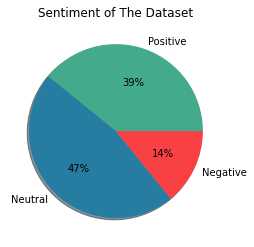

In [ ]:
sentiment = np.array([sentiment_dict["positive"],sentiment_dict["neutral"],sentiment_dict["negative"]])
labels = ["Positive", "Neutral", "Negative"]
mycolors = ['#43aa8b', '#277da1', '#f94144']

plt.pie(sentiment, labels = labels, colors = mycolors, shadow = True, autopct='%.0f%%')
plt.title("Sentiment of The Dataset")
plt.show()

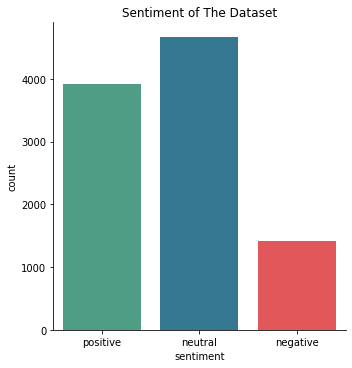

In [ ]:
sns.catplot(x="sentiment", kind="count",  data=df_data, palette=sns.color_palette(['#43aa8b', '#277da1', '#f94144']))
plt.title("Sentiment of The Dataset")
plt.show()

In [ ]:
counter = Counter(df_data["sentiment"])
print(counter)

Counter({'neutral': 4669, 'positive': 3917, 'negative': 1414})


In [ ]:
sample_neutral = df_data[df_data["sentiment"] == "neutral"].sample(1414)
sample_neutral.head()

,tweet,sentiment
428,a5 girl wardrobe would w,neutral
2781,event,neutral
8654,cannot,neutral
2143,luv ur avi,neutral
6979,tonight got photoshoooot,neutral


In [ ]:
sample_positive = df_data[df_data["sentiment"] == "positive"].sample(1414)
sample_positive.head()

,tweet,sentiment
6661,url new web site design easy use,positive
3666,hi time things likely wrap tonight gotta figure get back surrey afterwards thanks,positive
7850,ok rich kid give,positive
3086,hahaha bailey may fan boy ariana grande,positive
3227,new members,positive


In [ ]:
sample_negative = df_data[df_data["sentiment"] == "negative"].sample(1414)
sample_negative.head()

,tweet,sentiment
9183,hate seeing granddad like,negative
2841,especially conversational skills sucks,negative
6157,must tired,negative
6186,enough since wrote dark swan series ever write fifth book dying 3 years,negative
9245,taste bad though,negative


In [ ]:
df_sample = pd.concat([sample_neutral,sample_positive,sample_negative])
df_sample.index = range(len(df_sample))
df_sample.head()

,tweet,sentiment
0,a5 girl wardrobe would w,neutral
1,event,neutral
2,cannot,neutral
3,luv ur avi,neutral
4,tonight got photoshoooot,neutral


In [ ]:
df_data = df_sample.copy()
df_data.head()

,tweet,sentiment
0,a5 girl wardrobe would w,neutral
1,event,neutral
2,cannot,neutral
3,luv ur avi,neutral
4,tonight got photoshoooot,neutral


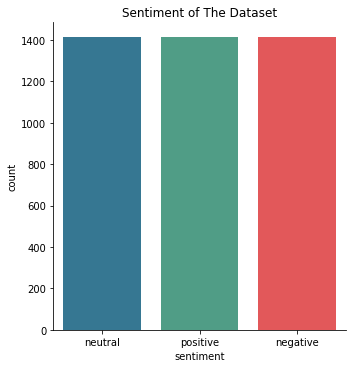

In [ ]:
sns.catplot(x="sentiment", kind="count",  data=df_data, palette=sns.color_palette(['#277da1', '#43aa8b', '#f94144']))
plt.title("Sentiment of The Dataset")
plt.show()

In [ ]:
counter = Counter(df_data["sentiment"])
print(counter)

Counter({'neutral': 1414, 'positive': 1414, 'negative': 1414})


In [ ]:
sentiment_mapping = {'positive': 1,'neutral': 0, 'negative': -1}
df_data["sentiment"] = df_data["sentiment"].map(sentiment_mapping).astype(int)

df_data.head()

,tweet,sentiment
0,a5 girl wardrobe would w,0
1,event,0
2,cannot,0
3,luv ur avi,0
4,tonight got photoshoooot,0


In [ ]:
df_data = df_data.sample(1414*3)
df_data.index = range(len(df_data))
df_data

,tweet,sentiment
0,thanks jen top weekend everyone,1
1,want sleep tired,-1
2,really like demi new song video,1
3,damn forgot hot chocolate,1
4,surprise visit naaahhh,0
...,...,...
4237,unfortunately curious english board announcements said trespassers fr clandestins,-1
4238,skype account order think hacked contacts sorry creating new one soon,-1
4239,oh sorry hear issues signal jojo pop full postcode happening,-1
4240,number one america wish could buy money,0


## Create a Model and Find the Best One

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_data["tweet"], df_data["sentiment"], test_size = 0.2, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000, norm="l2")
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  18983


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)

              precision    recall  f1-score   support

          -1       0.82      0.88      0.85       291
           0       0.84      0.80      0.82       273
           1       0.89      0.86      0.88       285

    accuracy                           0.85       849
   macro avg       0.85      0.85      0.85       849
weighted avg       0.85      0.85      0.85       849



In [ ]:
LogRmodel = LogisticRegression(C = 3, max_iter = 1000, n_jobs=-1)
LogRmodel.fit(X_train, y_train)
model_evaluate(LogRmodel)

              precision    recall  f1-score   support

          -1       0.83      0.86      0.84       291
           0       0.81      0.81      0.81       273
           1       0.89      0.86      0.87       285

    accuracy                           0.84       849
   macro avg       0.84      0.84      0.84       849
weighted avg       0.84      0.84      0.84       849



In [ ]:
perceptronmodel = Perceptron(tol=1e-3, random_state=0)
perceptronmodel.fit(X_train, y_train)
model_evaluate(perceptronmodel)

              precision    recall  f1-score   support

          -1       0.79      0.87      0.83       291
           0       0.81      0.73      0.77       273
           1       0.84      0.85      0.85       285

    accuracy                           0.82       849
   macro avg       0.82      0.81      0.81       849
weighted avg       0.82      0.82      0.81       849



##Predict the Sentiment for the Tweets and Do Cross Validation

In [ ]:
result = predict_sentiments(vectoriser, SVCmodel, df_tweets["tweet"])
reverse_sentiment_mapping = {1:'positive', 0:'neutral', -1:'negative'}
result["sentiment"] = result["sentiment"].map(reverse_sentiment_mapping).astype(str)
result

Cross Validation Score : [0.9086967  0.90628764 0.913033   0.90773308 0.90146953]


,tweet,sentiment
0,Cant believe were about to witness an Avengers Endgame level movie NEXT WEEK its been a while tbh,neutral
1,Im waiting,negative
2,One week away,neutral
3,Show me who you would cast as Harry Osborn in the MCU after,negative
4,New Scene from the streetfight for we see here a British Spiderman Sparking his marbles on the street something you never saw in original Spiderman Books cause that wouldnt work with anything spiderman does Nuts on Fire,positive
...,...,...
20750,Guess what month it is,neutral
20751,15 Days To Go,negative
20752,We know you could do better,positive
20753,Calling all you Spidey fans check out our exclusive combo available to pre order online during ticket purchase or in cinema from 15 December,positive


In [ ]:
sentiment_dict = {"positive" : 0, "negative" : 0, "neutral": 0}
for sentiment_value in result["sentiment"]:
  if sentiment_value == "positive":
    sentiment_dict["positive"] += 1
  elif sentiment_value == "negative":
    sentiment_dict["negative"] += 1
  elif sentiment_value == "neutral":
    sentiment_dict["neutral"] += 1

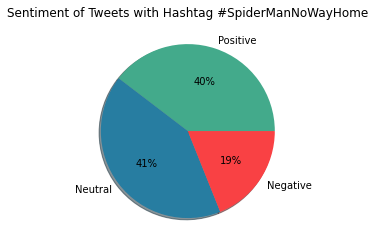

In [ ]:
sentiment = np.array([sentiment_dict["positive"],sentiment_dict["neutral"],sentiment_dict["negative"]])
labels = ["Positive", "Neutral", "Negative"]
mycolors = ['#43aa8b', '#277da1', '#f94144']

plt.pie(sentiment, labels = labels, colors = mycolors, shadow = True, autopct='%.0f%%')
plt.title("Sentiment of Tweets with Hashtag #SpiderManNoWayHome")
plt.show()

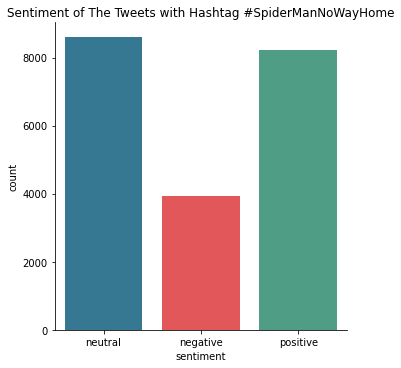

In [ ]:
sns.catplot(x="sentiment", kind="count",  data=result, palette=sns.color_palette(['#277da1', '#f94144', '#43aa8b']))
plt.title("Sentiment of The Tweets with Hashtag #SpiderManNoWayHome")
plt.show()

In [ ]:
counter = Counter(result["sentiment"])
print(counter)

Counter({'neutral': 8603, 'positive': 8224, 'negative': 3928})
